In [7]:
from sqlalchemy import create_engine, inspect

# Create an engine to connect to the database
engine = create_engine('sqlite:////blue/bsc4452/Marisa1988/project-2-deitzmorales/world.sqlite')

# Use the inspect module to get table names
inspector = inspect(engine)
tables = inspector.get_table_names()

print(tables)

['city', 'country', 'countrylanguage', 'sqlite_sequence']


In [1]:
import sqlite3

# Define the database path
database_path = '/blue/bsc4452/Marisa1988/project-2-deitzmorales/world.sqlite'

# Create a connection to the database
conn = sqlite3.connect(database_path)

# Create a cursor object
cursor = conn.cursor()

# Execute the query to get the first 5 lines of the Country table
cursor.execute("SELECT * FROM Country LIMIT 5")

# Fetch the results
results = cursor.fetchall()

# Print the results
for row in results:
    print(row)

# Close the connection
conn.close()

('ABW', 'Aruba', 'North America', 'Caribbean', 193.0, None, 103000, 78.4, 828.0, 793.0, 'Aruba', 'Nonmetropolitan Territory of The Netherlands', 'Beatrix', 129, 'AW')
('AFG', 'Afghanistan', 'Asia', 'Southern and Central Asia', 652090.0, 1919, 22720000, 45.9, 5976.0, None, 'Afganistan/Afqanestan', 'Islamic Emirate', 'Mohammad Omar', 1, 'AF')
('AGO', 'Angola', 'Africa', 'Central Africa', 1246700.0, 1975, 12878000, 38.3, 6648.0, 7984.0, 'Angola', 'Republic', 'Jos� Eduardo dos Santos', 56, 'AO')
('AIA', 'Anguilla', 'North America', 'Caribbean', 96.0, None, 8000, 76.1, 63.2, None, 'Anguilla', 'Dependent Territory of the UK', 'Elisabeth II', 62, 'AI')
('ALB', 'Albania', 'Europe', 'Southern Europe', 28748.0, 1912, 3401200, 71.6, 3205.0, 2500.0, 'Shqip�ria', 'Republic', 'Rexhep Mejdani', 34, 'AL')


In [2]:
import sqlite3

# Define the database path
database_path = '/blue/bsc4452/Marisa1988/project-2-deitzmorales/world.sqlite'

# Create a connection to the database
conn = sqlite3.connect(database_path)

# Create a cursor object
cursor = conn.cursor()

# Execute the query to get the first 5 lines of the City table
cursor.execute("SELECT * FROM City LIMIT 5")

# Fetch the results
results = cursor.fetchall()

# Print the results
for row in results:
    print(row)

# Close the connection
conn.close()

(1, 'Kabul', 'AFG', 'Kabol', 1780000)
(2, 'Qandahar', 'AFG', 'Qandahar', 237500)
(3, 'Herat', 'AFG', 'Herat', 186800)
(4, 'Mazar-e-Sharif', 'AFG', 'Balkh', 127800)
(6, 'Rotterdam', 'NLD', 'Zuid-Holland', 593321)


In [3]:
import sqlite3

# Define the database path
database_path = '/blue/bsc4452/Marisa1988/project-2-deitzmorales/world.sqlite'

# Create a connection to the database
conn = sqlite3.connect(database_path)

# Create a cursor object
cursor = conn.cursor()

# Execute the query to get the first 5 lines of the CountryLanguage table
cursor.execute("SELECT * FROM CountryLanguage LIMIT 5")

# Fetch the results
results = cursor.fetchall()

# Print the results
for row in results:
    print(row)

# Close the connection
conn.close()

('ABW', 'Dutch', 'T', 5.3)
('ABW', 'English', 'F', 9.5)
('ABW', 'Papiamento', 'F', 76.7)
('ABW', 'Spanish', 'F', 7.4)
('AFG', 'Balochi', 'F', 0.9)


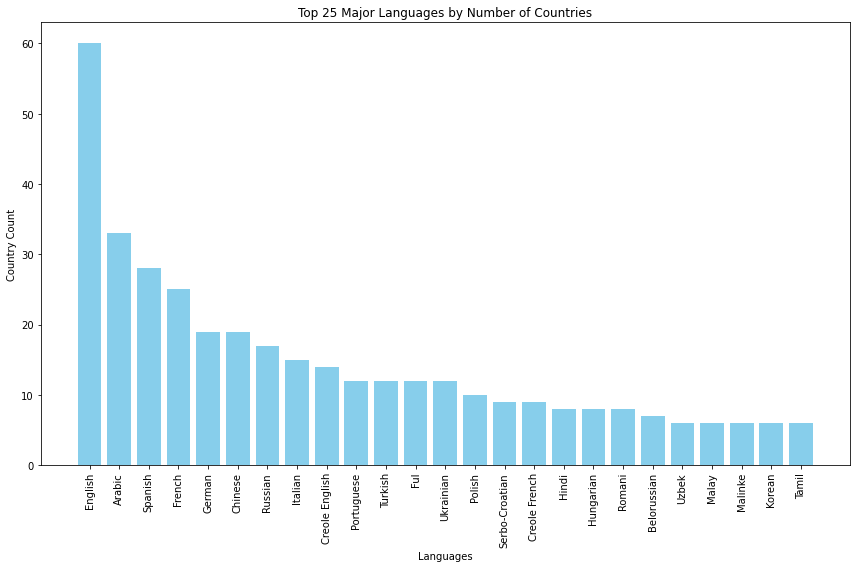

In [18]:
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, Column, String, Float
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
from collections import Counter

# Define the base class for declarative models
Base = declarative_base()

# Define the CountryLanguage table model
class CountryLanguage(Base):
    __tablename__ = 'CountryLanguage'
    CountryCode = Column(String, primary_key=True)
    Language = Column(String, primary_key=True)
    IsOfficial = Column(String)
    Percentage = Column(Float)

def plot_top_25_languages(database_url):
    # Create an engine to connect to the database
    engine = create_engine(database_url)
    
    # Create a session factory
    Session = sessionmaker(bind=engine)
    session = Session()
    
    # Query the CountryLanguage table
    languages = session.query(CountryLanguage).all()
    
    # Count the number of countries for each language
    language_counter = Counter([language.Language for language in languages])
    
    # Get the top 25 major languages by country count
    top_25_languages = language_counter.most_common(25)
    
    # Prepare data for plotting
    languages = [language for language, count in top_25_languages]
    country_counts = [count for language, count in top_25_languages]
    
    # Create a bar plot
    plt.figure(figsize=(12, 8))
    plt.bar(languages, country_counts, color='skyblue')
    plt.xlabel('Languages')
    plt.ylabel('Country Count')
    plt.title('Top 25 Major Languages by Number of Countries')
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Define the database URL
database_url = 'sqlite:////blue/bsc4452/Marisa1988/project-2-deitzmorales/world.sqlite'

# Call the function to plot the bar chart
plot_top_25_languages(database_url)

In [7]:
import sqlite3

# Define the database path
database_path = '/blue/bsc4452/Marisa1988/project-2-deitzmorales/world.sqlite'

# Create a connection to the database
conn = sqlite3.connect(database_path)

# Create a cursor object
cursor = conn.cursor()

# Join the Country table with the CountryLanguage table and include the Name and Continent columns from the Country table
query = """
SELECT Country.Name, Country.Continent, CountryLanguage.Language, CountryLanguage.IsOfficial, CountryLanguage.Percentage
FROM Country
JOIN CountryLanguage ON Country.Code = CountryLanguage.CountryCode
"""

cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Print the results
for row in results:
    print(row)

# Close the connection
conn.close()

('Aruba', 'North America', 'Dutch', 'T', 5.3)
('Aruba', 'North America', 'English', 'F', 9.5)
('Aruba', 'North America', 'Papiamento', 'F', 76.7)
('Aruba', 'North America', 'Spanish', 'F', 7.4)
('Afghanistan', 'Asia', 'Balochi', 'F', 0.9)
('Afghanistan', 'Asia', 'Dari', 'T', 32.1)
('Afghanistan', 'Asia', 'Pashto', 'T', 52.4)
('Afghanistan', 'Asia', 'Turkmenian', 'F', 1.9)
('Afghanistan', 'Asia', 'Uzbek', 'F', 8.8)
('Angola', 'Africa', 'Ambo', 'F', 2.4)
('Angola', 'Africa', 'Chokwe', 'F', 4.2)
('Angola', 'Africa', 'Kongo', 'F', 13.2)
('Angola', 'Africa', 'Luchazi', 'F', 2.4)
('Angola', 'Africa', 'Luimbe-nganguela', 'F', 5.4)
('Angola', 'Africa', 'Luvale', 'F', 3.6)
('Angola', 'Africa', 'Mbundu', 'F', 21.6)
('Angola', 'Africa', 'Nyaneka-nkhumbi', 'F', 5.4)
('Angola', 'Africa', 'Ovimbundu', 'F', 37.2)
('Anguilla', 'North America', 'English', 'T', 0.0)
('Albania', 'Europe', 'Albaniana', 'T', 97.9)
('Albania', 'Europe', 'Greek', 'F', 1.8)
('Albania', 'Europe', 'Macedonian', 'F', 0.1)
('Ando

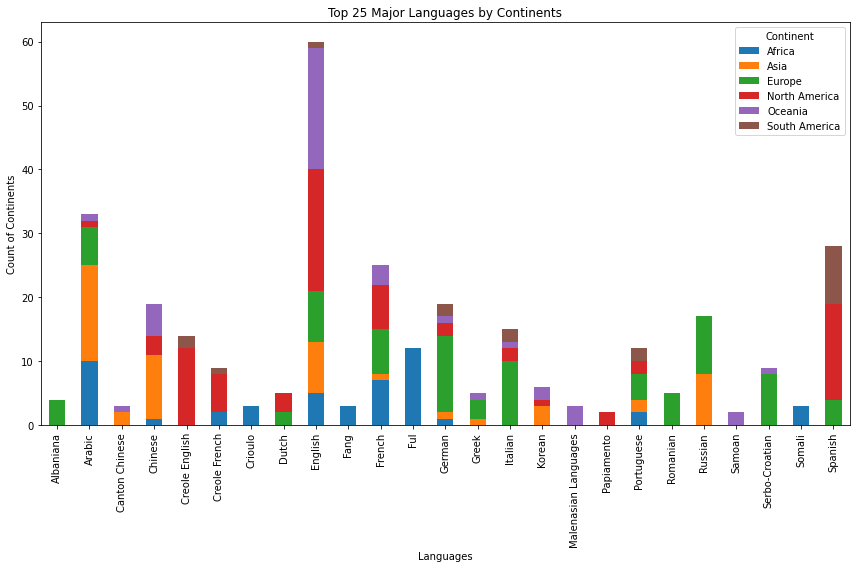

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Define the database path
database_path = '/blue/bsc4452/Marisa1988/project-2-deitzmorales/world.sqlite'

# Create a connection to the database
conn = sqlite3.connect(database_path)

# Create a cursor object
cursor = conn.cursor()

# Join the Country table with the CountryLanguage table and include the Name and Continent columns from the Country table
query = """
SELECT Country.Name, Country.Continent, CountryLanguage.Language, CountryLanguage.IsOfficial, CountryLanguage.Percentage
FROM Country
JOIN CountryLanguage ON Country.Code = CountryLanguage.CountryCode
"""

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Get the top 25 major languages by percentage
top_25_languages = df.groupby('Language')['Percentage'].sum().nlargest(25).index

# Filter the DataFrame to include only the top 25 languages
df_top_25 = df[df['Language'].isin(top_25_languages)]

# Group by Language and Continent and count occurrences
language_continent_counts = df_top_25.groupby(['Language', 'Continent']).size().unstack(fill_value=0)

# Plot the bar chart
language_continent_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Languages')
plt.ylabel('Count of Continents')
plt.title('Top 25 Major Languages by Continents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

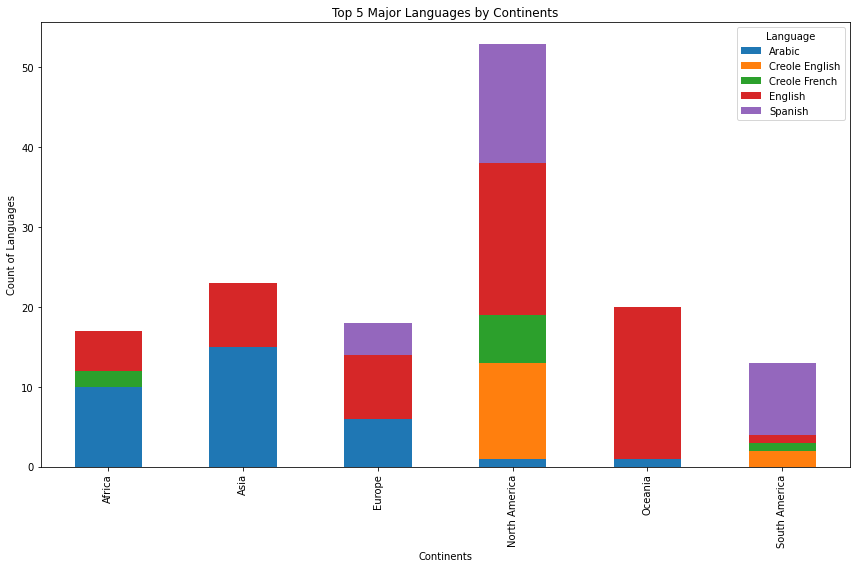

In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Define the database path
database_path = '/blue/bsc4452/Marisa1988/project-2-deitzmorales/world.sqlite'

# Create a connection to the database
conn = sqlite3.connect(database_path)

# Create a cursor object
cursor = conn.cursor()

# Join the Country table with the CountryLanguage table and include the Name and Continent columns from the Country table
query = """
SELECT Country.Name, Country.Continent, CountryLanguage.Language, CountryLanguage.IsOfficial, CountryLanguage.Percentage
FROM Country
JOIN CountryLanguage ON Country.Code = CountryLanguage.CountryCode
"""

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Get the top 5 major languages by percentage
top_5_languages = df.groupby('Language')['Percentage'].sum().nlargest(5).index

# Filter the DataFrame to include only the top 5 languages
df_top_5 = df[df['Language'].isin(top_5_languages)]

# Group by Continent and Language and count occurrences
continent_language_counts = df_top_5.groupby(['Continent', 'Language']).size().unstack(fill_value=0)

# Plot the bar chart
continent_language_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Continents')
plt.ylabel('Count of Languages')
plt.title('Top 5 Major Languages by Continents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()